In [1]:
import pandas as pd
import numpy as np
from scaling import standardize, normalize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from collections import Counter

import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report


In [2]:

#df2015 = pd.read_csv('../data/kaasa/kaasa_2015.csv', index_col=None, header=0)
df2016 = pd.read_csv('../data/kaasa/kaasa_2016.csv', index_col=None, header=0)
df2017 = pd.read_csv('../data/kaasa/kaasa_2017.csv', index_col=None, header=0)
df2018 = pd.read_csv('../data/kaasa/kaasa_2018.csv', index_col=None, header=0)
#df2019 = pd.read_csv('../data/kaasa/kaasa_2019.csv', index_col=None, header=0)
df2020 = pd.read_csv('../data/kaasa/kaasa_2020.csv', index_col=None, header=0)
#df2021 = pd.read_csv('../data/kaasa/kaasa_2021.csv', index_col=None, header=0)

attack_files = [df2016, df2017, df2018, df2020]
#all_files = [df2015, df2016, df2017, df2018, df2019, df2020, df2021]

df = pd.concat(attack_files, axis=0, ignore_index=True)

df = df.drop(columns=['source_id', 'individual', 'owner_id', 'name', 'longitude', 'latitude', 'date_time', 'distance',  'temperature', 'sin_time', 'cos_time'])
df = standardize(df, ['velocity']) # standarize the data
df = normalize(df, ['velocity'], 0, 1) # normalize the data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('attack', axis=1), df['attack'], test_size=0.2, random_state=42)


In [3]:

# Create a random forest classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', round(accuracy*100, 2), "%")

Accuracy: 96.11 %


In [4]:
y_pred_count = Counter(y_pred)
y_test_count = y_test.value_counts()

print('y_test (faktisk):\n', y_test_count)
print('y_pred (predikert):', y_pred_count)


y_test (faktisk):
 0    23403
1      692
Name: attack, dtype: int64
y_pred (predikert): Counter({0: 23792, 1: 303})


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     23403
           1       0.10      0.04      0.06       692

    accuracy                           0.96     24095
   macro avg       0.53      0.52      0.52     24095
weighted avg       0.95      0.96      0.95     24095



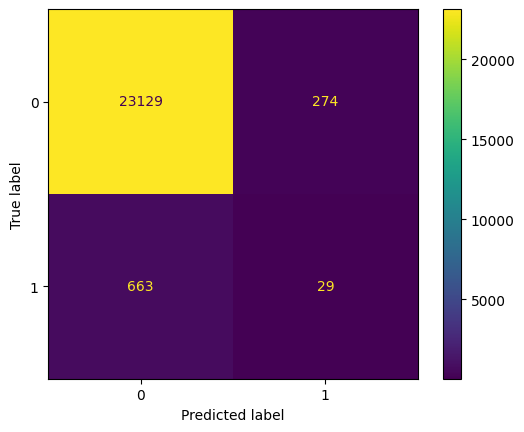

In [5]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

#True Negative (Top-Left Quadrant)
#False Positive (Top-Right Quadrant)
#False Negative (Bottom-Left Quadrant)
#True Positive (Bottom-Right Quadrant)

# All numeric features

In [6]:
df2015 = pd.read_csv('../data/kaasa/kaasa_2015.csv', index_col=None, header=0)
df2016 = pd.read_csv('../data/kaasa/kaasa_2016.csv', index_col=None, header=0)
df2017 = pd.read_csv('../data/kaasa/kaasa_2017.csv', index_col=None, header=0)
df2018 = pd.read_csv('../data/kaasa/kaasa_2018.csv', index_col=None, header=0)
df2019 = pd.read_csv('../data/kaasa/kaasa_2019.csv', index_col=None, header=0)
df2020 = pd.read_csv('../data/kaasa/kaasa_2020.csv', index_col=None, header=0)
df2021 = pd.read_csv('../data/kaasa/kaasa_2021.csv', index_col=None, header=0)

#attack_files = [df2016, df2017, df2018, df2020]
all_files = [df2015, df2016, df2017, df2018, df2019, df2020, df2021]

df = pd.concat(all_files, axis=0, ignore_index=True)

df['date_time'] = pd.to_datetime(df['date_time'])

df = df.drop(columns=['source_id', 'individual', 'owner_id', 'name',  'distance', 'sin_time', 'cos_time', 'date_time',])
df = standardize(df, ['velocity', 'longitude', 'latitude', 'temperature', 'altitude']) # standarize the data
df = normalize(df, ['velocity', 'longitude', 'latitude', 'temperature', 'altitude'], 0, 1) # normalize the data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('attack', axis=1), df['attack'], test_size=0.2, random_state=42)

In [7]:
# Create a random forest classifier model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', round(accuracy*100, 2), "%")

Accuracy: 98.66 %


In [8]:
y_pred_count = Counter(y_pred)
y_test_count = y_test.value_counts()

print('y_test (faktisk):\n', y_test_count)
print('y_pred (predikert):', y_pred_count)

y_test (faktisk):
 0    47244
1      656
Name: attack, dtype: int64
y_pred (predikert): Counter({0: 47874, 1: 26})


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     47244
           1       0.73      0.03      0.06       656

    accuracy                           0.99     47900
   macro avg       0.86      0.51      0.52     47900
weighted avg       0.98      0.99      0.98     47900



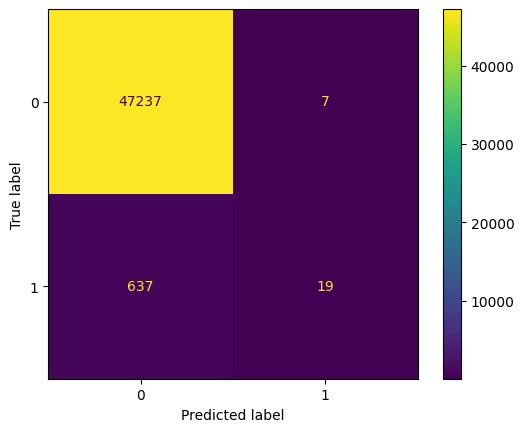

In [9]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

In [26]:
importances = rf.feature_importances_

feature_names = df.columns[:-1]
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

for i, feature in enumerate(X_train.columns):
    print(feature, 'importance: ', importances[i-1])

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

ValueError: Length of values (5) does not match length of index (6)

In [11]:
# Create a DataFrame of feature importances
df_importances = pd.DataFrame({'feature': df.columns[:-1], 'importance': importances})

# Create a bar chart of feature importances using Plotly Express
fig = px.bar(df_importances, x='importance', y='feature', orientation='h', title='Feature Importances')
fig.show()

# PCA

In [12]:
df2015 = pd.read_csv('../data/kaasa/kaasa_2015.csv', index_col=None, header=0)
df2016 = pd.read_csv('../data/kaasa/kaasa_2016.csv', index_col=None, header=0)
df2017 = pd.read_csv('../data/kaasa/kaasa_2017.csv', index_col=None, header=0)
df2018 = pd.read_csv('../data/kaasa/kaasa_2018.csv', index_col=None, header=0)
df2019 = pd.read_csv('../data/kaasa/kaasa_2019.csv', index_col=None, header=0)
df2020 = pd.read_csv('../data/kaasa/kaasa_2020.csv', index_col=None, header=0)
df2021 = pd.read_csv('../data/kaasa/kaasa_2021.csv', index_col=None, header=0)

#attack_files = [df2016, df2017, df2018, df2020]
all_files = [df2015, df2016, df2017, df2018, df2019, df2020, df2021]

df = pd.concat(all_files, axis=0, ignore_index=True)

df['date_time'] = pd.to_datetime(df['date_time'])

df = df.drop(columns=['source_id', 'individual', 'owner_id', 'name',  'distance', 'sin_time', 'cos_time'])
df = standardize(df, ['velocity', 'longitude', 'latitude', 'date_time', 'temperature', 'altitude']) # standarize the data

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# create a PCA object
pca = PCA()

# fit the data to the model
pca.fit(scaled_data)

# print the covariance matrix
cov_matrix = np.cov(scaled_data.T)
print("Covariance Matrix:\n", cov_matrix)

# display the explained variance ratio
print("Explained Variance Ratio:\n", pca.explained_variance_ratio_)

# display the principal components
print("Principal Components:\n", pca.components_)

Covariance Matrix:
 [[ 1.00000418e+00  1.20491832e-01  5.97024515e-01  4.28204358e-01
   5.06185514e-01  6.45675964e-02 -5.39367793e-02]
 [ 1.20491832e-01  1.00000418e+00  1.14394351e-01 -8.41061291e-03
   3.05611332e-02  1.74989710e-02 -4.53684692e-02]
 [ 5.97024515e-01  1.14394351e-01  1.00000418e+00  3.37625798e-01
   4.21650153e-01  1.84478876e-02 -5.01831274e-02]
 [ 4.28204358e-01 -8.41061291e-03  3.37625798e-01  1.00000418e+00
   8.52083724e-01  6.65580386e-02 -4.90700136e-03]
 [ 5.06185514e-01  3.05611332e-02  4.21650153e-01  8.52083724e-01
   1.00000418e+00  7.67087440e-02  1.97974396e-04]
 [ 6.45675964e-02  1.74989710e-02  1.84478876e-02  6.65580386e-02
   7.67087440e-02  1.00000418e+00 -7.48917026e-03]
 [-5.39367793e-02 -4.53684692e-02 -5.01831274e-02 -4.90700136e-03
   1.97974396e-04 -7.48917026e-03  1.00000418e+00]]
Explained Variance Ratio:
 [0.37195809 0.15757944 0.14234488 0.13749777 0.11437634 0.05607863
 0.02016485]
Principal Components:
 [[ 0.482719    0.07703036  0.4